<h1 align='center' style='color:purple'><b>Decision Trees - Part 1</b></h1>

A decision tree follows tree-like model of decisions and their possible outcomes. It is a way to represent an algorithm that only contains conditional control statements.
It a flowchart-like structure. Each internal node represents a "test" on a feature whereas every branch represents the outcome of the test, & each terminal/leaf node represents the outcome which can be a continuous value or class label for regression and classification problem respectively.  
 - It is a Supervised Learning Algorithm.
 - it can be used for both classification and regression problems.
 - It can also handle non-linear data which was not possible in case of linear models

Advantages :  
 - Simple and easy to understand and visualize
 - Somewhat resistant to outliers
 - No Feature Scaling is Required.

Disadvantages :  
 - Overfitting
 - High variance
 - Not suitable for large Datasets

<b>Load the data that we will be using to train our model</b>

Here we are using Titanic dataset which contains the data from one of the most infamous shipwrecks in history : The sinking of the Titanic.

<b> Import Necessary Libraries</b>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<b>Get the data<b/>

In [ ]:
import pandas as pd

df = pd.read_csv('titanic.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Data Dictionary</b>

##### Variable	& Definition
 - Survived (Target) :	Survival of passenger	(0 = No, 1 = Yes)
 - Pclass : Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
 - Sex : Gender
 - Age : Age in years
 - Sibsp :	# of siblings / spouses aboard the Titanic
 - Parch : # of parents / children aboard the Titanic
 - Ticket :	Ticket number
 - Fare :	Passenger fare
 - Cabin : Cabin number
 - Embarked :	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S =  Southampton)


<b>Drop insignificant Variables<b/>

In [ ]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

As a person's survival may not depend on these variables.

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


<b>Separate Inputs and Target</b>

In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

<b>Encode Categorical Variables 'Sex', as decision trees implemented in scikit-learn accepts numerical variables only.</b>


In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 0})

In [ ]:
inputs.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,1,22.0,7.2500
2,1,0,38.0,71.2833
3,3,0,26.0,7.9250
4,1,0,35.0,53.1000
5,3,1,35.0,8.0500


In [ ]:
inputs.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [ ]:
# print first 10 records
inputs.Age.isnull().sum()

177

<b>We can see that there are a few NaN values in Age. So we will  fill those missing values with the avergae age.</b>

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
# print first 10 records
inputs.Age.isnull().sum()

0

The age of Passenger number 6 has been filled with the average age(29.699).

<b>Separate Training and Testing Data</b>

In [ ]:
# import train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

Here test_size is used to specify test data size. 0.3 means 30% of data will be used for test data & remaining 70% will be used for training data.  
 X_train, y_train : inputs and target of training data  
 X_test, y_test : inputs and target of testing data

<b> Check the length of Traing and Testing Data</b>

In [ ]:
print('Length of Training Data : {} that is 70% of original data.'.format(len(X_train)))
print('Length of Testing Data : {} that is 30% of original data.'.format(len(X_test)))

Length of Training Data : 623 that is 70% of original data.
Length of Testing Data : 268 that is 30% of original data.


<b>Import Decision Tree Classifier</b>  
In this project, our target variable is of binary data type. So a Classification model will be used.

In [ ]:
from sklearn import tree

# initialize a Decision Tree classifier model.
model = tree.DecisionTreeClassifier()

<b>Model Training</b> : Fitting/Training a model means that you're making your model learn the relationship b/w predictors and target so that you can predict the future values of the target.

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

<b>After model training, make predictions for thet testing data.</b>

In [ ]:
model_accuracy = model.score(X_test,y_test)
print('Print model accuracy =',round(model_accuracy,3))

Print model accuracy = 0.799


model.score(X_test,ytest) : This function takes a feature matrix X_test and the expected target values y_test. Then y_testis compared with thet Predictions for X_test & either accuracy (for classification) or R2 score (for regression) is returned.

<b> Plot Decision Tree </b>

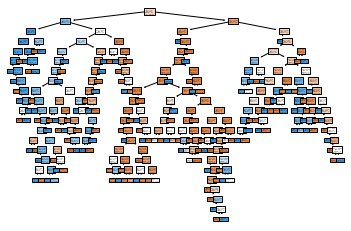

In [ ]:
# Initialize a figure and use figsize to control the size of the rendered image.
#plt.figure(figsize=(120,110))

# Plot Decision tree
tree.plot_tree(model, filled=True);


#Here filled is boolean parameter (default value = False) When set to True,
#it paints the decisiontree nodes to indicate majority class for classification problem.

<b>Build a text report showing the rules of the Decision Tree model.</b>

[<b> Minimal Cost-Complexity Pruning</b>](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)  
Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.  
ccp_alpha : (non-negative float, default=0.0)
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.

In [ ]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00025536, 0.00040128, 0.00040765, 0.00045273,
       0.00048154, 0.00053505, 0.00066881, 0.00070815, 0.00075798,
       0.00085777, 0.00096308, 0.00099366, 0.00100894, 0.00105793,
       0.00107009, 0.00107009, 0.00107009, 0.00107009, 0.00112105,
       0.00120385, 0.00124691, 0.00128411, 0.00133761, 0.00133761,
       0.00137328, 0.00137583, 0.00139265, 0.00140449, 0.00142679,
       0.00148166, 0.00149677, 0.00155336, 0.00158082, 0.0015924 ,
       0.00160514, 0.00166834, 0.00171215, 0.00173304, 0.00175106,
       0.00176565, 0.00187266, 0.00191088, 0.00192616, 0.0019317 ,
       0.00214018, 0.00222936, 0.00231216, 0.00288925, 0.00294275,
       0.00298785, 0.00302023, 0.00303192, 0.00309562, 0.00407292,
       0.01250611, 0.01964485, 0.03698769, 0.12503939])

DecisionTreeClassifier.cost_complexity_pruning_path : returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

<b>For each value of ccp_alpha, train a DecisionTree model and store it in models.</b>

In [ ]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12503939161206412


<b>For all the models trained for different values of ccp_alpha, find training and testing accuracy and plot it.</b>

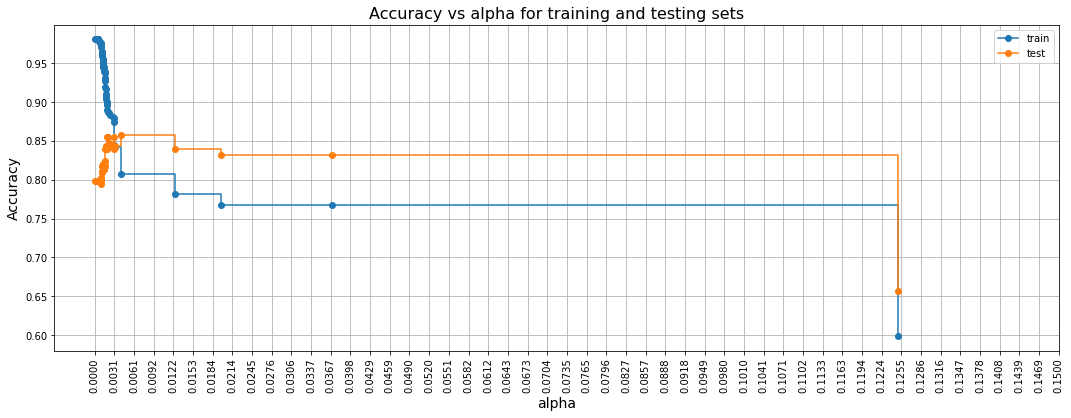

In [ ]:
# Calculate train and test accuracy of all the models
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

# plot training and testingaccuracy
fig, ax = plt.subplots(figsize = (18,6))
ax.set_xlabel("alpha", fontsize = 14)
ax.set_ylabel("Accuracy", fontsize = 14)
ax.set_title("Accuracy vs alpha for training and testing sets", fontsize = 16)
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.xticks(np.linspace(0,0.15,num=50),rotation=90)
ax.legend()
ax.grid()
plt.show()

 - From the above plot, it is clear that around 0.003 ccp_alpha, model accuracy for test data is highest.
 - It can also be noted that near 0.003 ccp_alpha, training and testing accuracies are almost equal which means model is not over-fitting.

<b> Train Final Decision tree model with the selected value of ccp_alpha.</b>

In [ ]:
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00303192)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00303192, random_state=0)

In [ ]:
# Make predictions for testing data
pred=model.predict(X_test)

# Import accuracy_score, which also calculates the accuracy of predictions
from sklearn.metrics import accuracy_score
print('Model accuracy after post-pruning :',round(accuracy_score(y_test, pred),4))

Model accuracy after post-pruning : 0.8396


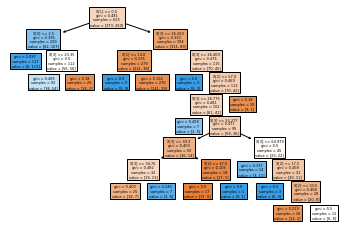

In [ ]:
tree.plot_tree(model,filled=True);

The model accuracy after post pruning increased. This shows that without post pruning, our initial decisionTree model was over-fitting on the training data.

<b> Lets visualize our final DecisonTree model to observe the effect of post-pruning. </b>

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
350,3,1,42.000000,8.6625
711,1,0,24.000000,49.5042
630,3,1,29.699118,7.7333
510,3,1,26.000000,56.4958
220,2,1,30.000000,10.5000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=150,ccp_alpha=0.00303192)
clf.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.00303192, n_estimators=150)

<b>It can be observed that after post-pruning, the size of decision tree reduced.</b>

In [ ]:
y_predict=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8470149253731343

In [ ]:
clf.feature_importances_
clf.

array([0.13722354, 0.36101423, 0.21732028, 0.28444195])

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare
PassengerId,,,,
350,3,1,42.000000,8.6625
711,1,0,24.000000,49.5042
630,3,1,29.699118,7.7333
510,3,1,26.000000,56.4958
220,2,1,30.000000,10.5000
